<a href="https://colab.research.google.com/github/taekyu-lee/BootCamp/blob/main/test1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

In [12]:
df = pd.read_csv('https://raw.githubusercontent.com/eupshin/bootcamp/main/case4_1_time1.csv')

print(df.shape)
df2=df[:3500]
df2

(3965, 14)


,time1,CAPM10,CAPM2.5,CAPM1,RAPM10,RAPM2.5,RAPM1,SAPM10,SAPM2.5,SAPM1,Filter,circulation,Flow rate,Purifier
0,2021-03-16 9:02,26.7,17.4,10.0,9.9,8.8,7.5,1.0,1.0,0.7,0,0,1,0
1,2021-03-16 9:02,32.1,17.4,10.2,10.2,8.3,7.5,1.6,1.5,0.9,0,0,1,0
2,2021-03-16 9:03,34.7,19.5,10.2,8.6,8.6,7.9,1.2,1.2,1.2,0,0,1,0
3,2021-03-16 9:03,46.7,19.2,10.7,9.4,8.5,7.4,0.8,0.8,0.8,0,0,1,0
4,2021-03-16 9:03,128.6,25.2,11.0,8.9,8.5,7.7,1.0,1.0,1.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,2021-03-16 14:52,3.6,2.5,2.0,2.0,2.0,2.0,1.0,1.0,1.0,0,0,1,1
3496,2021-03-16 14:52,5.5,4.0,2.1,2.1,2.1,2.0,0.9,0.9,0.9,0,0,1,1
3497,2021-03-16 14:52,7.0,3.4,2.0,2.1,2.1,2.1,0.9,0.9,0.9,0,0,1,1
3498,2021-03-16 14:52,4.1,2.9,2.0,1.7,1.7,1.7,1.0,1.0,1.0,0,0,1,1


In [13]:
features =[ 'RAPM10', 'RAPM2.5', 'RAPM1','SAPM10', 'SAPM2.5', 'SAPM1', 'Filter', 'circulation', 'Flow rate','Purifier']

#features =[ 'RAPM10', 'RAPM2.5', 'RAPM1','SAPM10']

x = df2[features].values
y = df2["CAPM10"].values


#plt.plot(y)


In [15]:
# 전체 시계열 데이터중 앞부분 75%를 훈련 데이터로, 나머지를 검증 데이터로 나누는 예
ratio = 0.75
cut = np.int(len(y)*ratio)
train = y[:cut]
test = y[cut:]
len(y), len(train), len(test)

(3500, 2625, 875)

In [28]:
model = RandomForestRegressor(n_estimators= 100)
model.fit(x_train, y_train)

model.score(x_test, y_test)

0.8406448478853814

In [29]:
def split_seq(data, n_steps):
    x, y = [], []
    for i in range(len(data)):
        if i > len(data) - (n_steps + 1) : break
        x.append(data[i:i+n_steps])
        y.append(data[i+n_steps])
    return np.array(x), np.array(y)

In [30]:
# 선형 회귀 모델 함수

lr = LinearRegression()

# 과거 10개 데이터로 
n_steps = 10
# 훈련 데이터
x_train, y_train = split_seq(train, n_steps)
# 검증 데이터
x_test, y_test = split_seq(test, n_steps)
# 훈련 수행
lr.fit(x_train, y_train) 
x_train,y_train
# 선능 평가: 회귀에서는 디폴트로 R-Squared 점수를 알려준다 (뒤에서 설명함)
lr.score(x_test, y_test).round(4) 

0.8663

In [31]:
y_pred = lr.predict(x_test)
pd.DataFrame({"y_test":y_test, "y_pred":y_pred.round(2)})[:5]

,y_test,y_pred
0,34.2,30.19
1,40.9,32.03
2,28.4,34.31
3,25.7,32.23
4,28.1,30.02


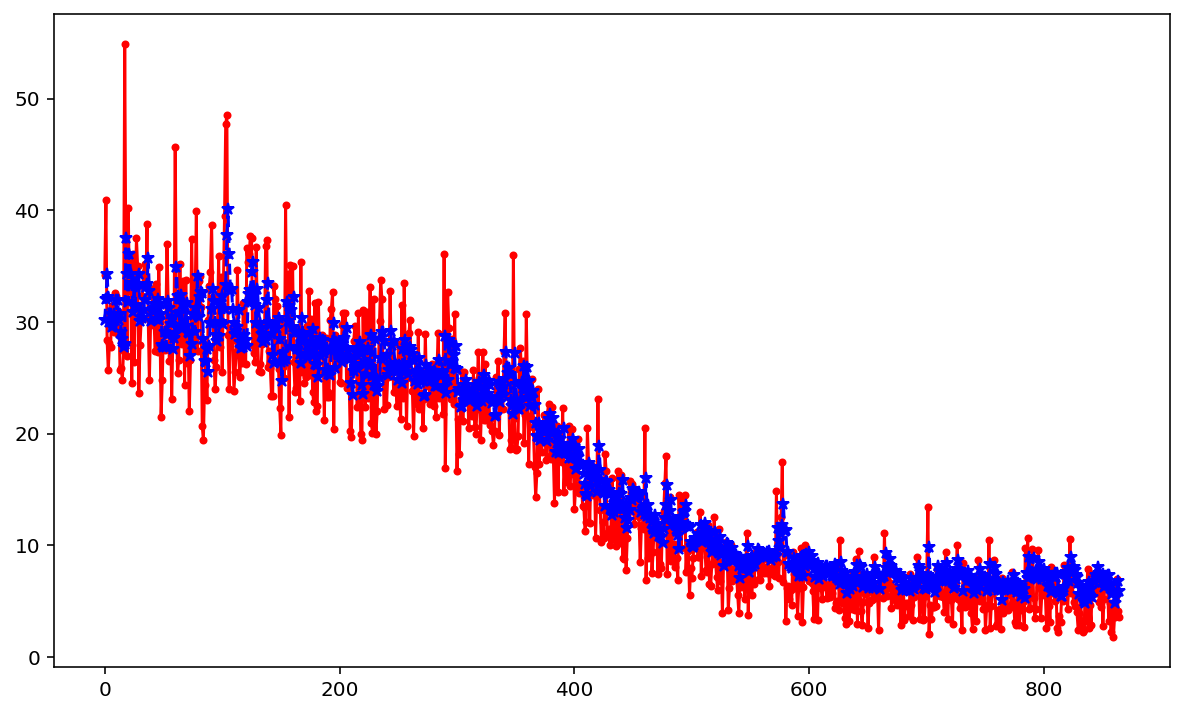

In [32]:
# 실제값 붉은색, 예측값 파란색
plt.figure(figsize=(10, 6))
plt.plot(y_test[:4000], 'r-', marker='.')
plt.plot(y_pred[:4000], 'b--', marker='*')
plt.show()

In [33]:
lr= LinearRegression()
for n_steps in range(1,50):
  x_train, y_train = split_seq(train, n_steps)
  x_test, y_test = split_seq(test, n_steps)
  lr.fit(x_train, y_train) 
  print(n_steps, lr.score(x_test, y_test).round(4))

1 0.6813
2 0.7787
3 0.8177
4 0.8353
5 0.8476
6 0.8526
7 0.8573
8 0.8606
9 0.8647
10 0.8663
11 0.8667
12 0.8673
13 0.8698
14 0.8724
15 0.872
16 0.8731
17 0.8732
18 0.8729
19 0.8729
20 0.8737
21 0.8736
22 0.8738
23 0.8736
24 0.8742
25 0.8741
26 0.8744
27 0.8743
28 0.8804
29 0.8799
30 0.8796
31 0.8796
32 0.8788
33 0.8786
34 0.8795
35 0.8794
36 0.88
37 0.8796
38 0.8783
39 0.8775
40 0.8787
41 0.8788
42 0.878
43 0.8772
44 0.8766
45 0.8762
46 0.8759
47 0.8758
48 0.8757
49 0.8764


In [34]:
# 선형 회귀 모델 함수

lr = LinearRegression()

# 과거 28개 데이터로 
n_steps = 28
# 훈련 데이터
x_train, y_train = split_seq(train, n_steps)
# 검증 데이터
x_test, y_test = split_seq(test, n_steps)
# 훈련 수행
lr.fit(x_train, y_train) 
x_train,y_train
# 선능 평가: 회귀에서는 디폴트로 R-Squared 점수를 알려준다 (뒤에서 설명함)
lr.score(x_test, y_test).round(4) 

0.8804

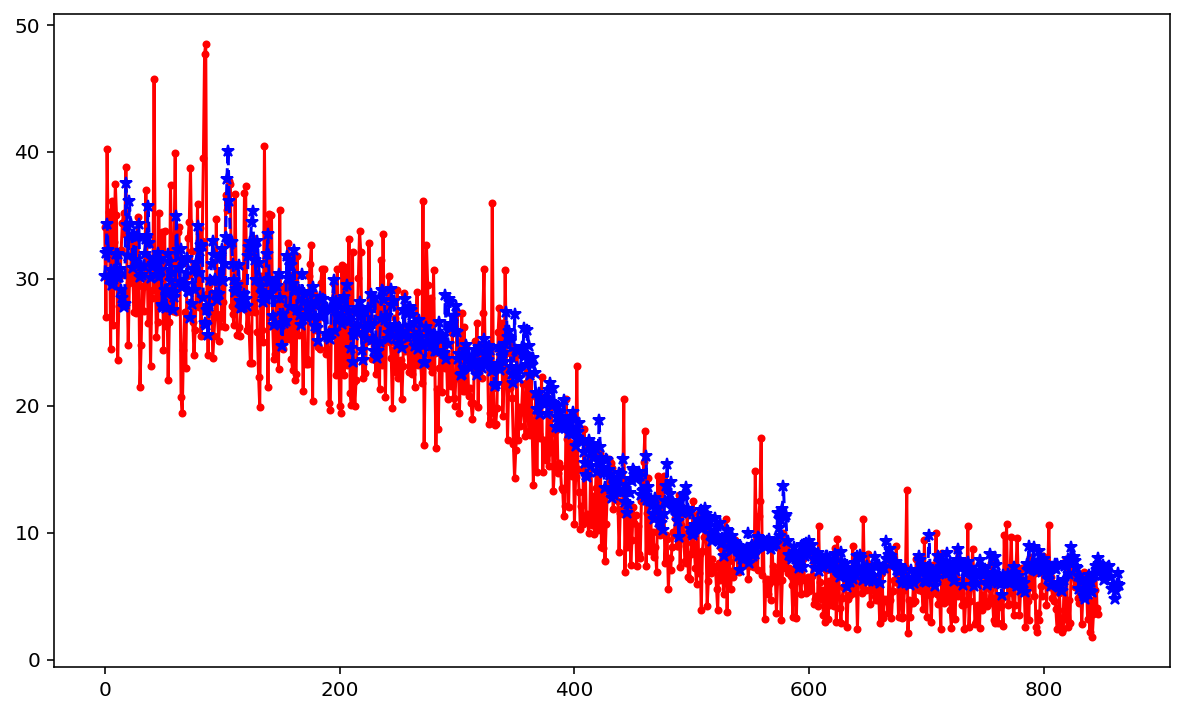

In [35]:
# 실제값 붉은색, 예측값 파란색
plt.figure(figsize=(10, 6))
plt.plot(y_test[:4000], 'r-', marker='.')
plt.plot(y_pred[:4000], 'b--', marker='*')
plt.show()